In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from skipper import observe

In [3]:
plt.rcParams['font.size']=20

sys.path.append('../scripts')

import make_pointings
import sigjson_f2021b

import datetime
import pytz

In [4]:
ctio = observe.ObservingSite ()

In [5]:
oiii_pointings = sigjson_f2021b.load_mastercat_cosmos ()
halpha_pointings = sigjson_f2021b.load_mastercat_cosmos ( '../pointings/S2021A.csv')
all_pointings = np.concatenate([oiii_pointings.index, halpha_pointings.index])

In [6]:
tele = pd.read_csv('/Users/kadofong/Downloads/tele20210912.csv')
coo = observe.CopilotOutput ('/Users/kadofong/Downloads/db_merian.fits',
                            pointings=all_pointings)
reobs = coo.flag_for_reobservation ( )

# Predict GAMA/COSMOS coverage in F2021B

In [7]:
datelist_2021b_n536 = [(2021,12,31), (2021,1,1)]
datelist_2021b_n536 += [(2021,1,ix) for ix in np.arange(3,5)]
datelist_2021b_n536 += [(2021,1,ix) for ix in np.arange(6,8)]
datelist_2021b_n536 += [(2021,1,ix) for ix in np.arange(9,12)]
datelist_2021b_n536 += [(2022,1,ix) for ix in np.arange(25, 32)]
nightslot_2021b_n536 = [2,2]
nightslot_2021b_n536 += [2 for ix in np.arange(3,5)]
nightslot_2021b_n536 += [2 for ix in np.arange(6,8)]
nightslot_2021b_n536 += [2 for ix in np.arange(9,12)]
nightslot_2021b_n536 += [2 for ix in np.arange(25,32)]
priorities_2021b_n536 = {'COSMOS':0, 'GAMA':1}  

In [8]:
fmt = sigjson_f2021b.fmt
et = sigjson_f2021b.et

In [9]:
prior_pointings = pd.DataFrame ( index=all_pointings,
                           columns=['is_queued','qstamp','has_priority'])
prior_pointings['is_queued'] = False
prior_pointings.loc[coo.merian_sidecar['object'], 'is_queued'] = True
prior_pointings.loc[reobs,'is_queued'] = False

In [10]:
prior_pointings['is_queued'].sum()

251

In [11]:
datelist = datelist_2021b_n536
nightslot_l = nightslot_2021b_n536
priorities = priorities_2021b_n536
ocat = observe.ObsCatalog(comment='--', proposer='Leathaud', 
                          propid='2020B-0288', seqid='S2021B')

f2021b_pointings = prior_pointings.reindex(oiii_pointings.index)
for ix,date in enumerate(datelist):
    year, month, day = date        
    night_start, night_end = ctio.get_sunriseset ( year, month, day )
    if nightslot_l[ix] == 0:
        print('[predict] night slot: Full night')
        obs_start = night_start
        obs_end = night_end
    elif nightslot_l[ix] == 1:
        print('[predict] night slot: First half')
        obs_start = night_start
        obs_end = obs_start + 0.5*(night_end-obs_start)
    else:
        print('[predict] night slot: Second half')
        obs_start = night_start + 0.5*(night_end-night_start)
        obs_end = night_end 

    print(f"obsStart: {obs_start.astimezone(ctio.timezone).strftime(fmt)} Santiago")
    print(f"          {obs_start.astimezone(et).strftime(fmt)} ET")
    print(f"          {obs_start.strftime(fmt)} UTC")
    print(f"obsEnd:   {obs_end.astimezone(ctio.timezone).strftime(fmt)} Santiago")
    print(f"          {obs_end.astimezone(et).strftime(fmt)} ET")
    print(f"          {obs_end.strftime(fmt)} UTC")

    f2021b_pointings = ocat.plan_night ( obs_start, ctio, 
                                 catalog=oiii_pointings, 
                                 obs_end=obs_end,
                                 is_queued=f2021b_pointings.copy(),
                                 save=False,
                                 maxairmass=1.5, 
                                 object_priority=priorities )



happy new years
[predict] night slot: Second half
obsStart: 2022/01/01 01:47 AM Santiago
          2021/12/31 11:47 PM ET
          2022/01/01 04:47 AM UTC
obsEnd:   2022/01/01 05:33 AM Santiago
          2022/01/01 03:33 AM ET
          2022/01/01 08:33 AM UTC
Minimum airmass available: 1.3565375321240605
(780s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.2020391998941575

==> 20220101_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1503982676515518

==> 20220101_06, 3600.0s available
3600s filled by priority=0.0 objects
0s filled by priority=1.0 objects
Minimum airmass available: 1.1448640650662405

==> 20220101_07, 3600.0s available
3600s filled by priority=0.0 objects
0s filled by priority=1.0 objects
Minimum airmass available: 1.1430156530624465

==> 20220101_08, 3179.9999999999704s available
[plan_night] padding the last hour script
2700s filled by priority=0.0 objects
0s fille

Minimum airmass available: 1.2764794333719816
(510s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.191685056018312

==> 20210112_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.14869868248815

==> 20210112_06, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1576166863766884

==> 20210112_07, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1479684325604043

==> 20210112_08, 3779.9999999999586s available
[plan_night] padding the last hour script
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
[predict] night slot: Second half
obsStart: 2022/01/26 01:55 AM Santiago
          2022/01/25 11:55 PM ET
          2022/01/26 04:55 AM UTC
obsEnd:   2022/01/26 05:57 AM Santiago
          2022/01/26 03:57 AM ET
          2022/01/26 08:57 

Minimum airmass available: 1.143089426189055

==> 20220201_09, 1439.9999999999623s available
[plan_night] padding the last hour script
0s filled by priority=0.0 objects
900s filled by priority=1.0 objects


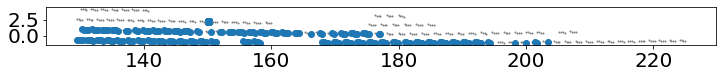

In [12]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot(111, aspect='equal')
plt.scatter ( 
    oiii_pointings['RA'],
    oiii_pointings['dec'],
    s=1,
    color='grey',
)    
plt.scatter ( 
    oiii_pointings.reindex(f2021b_pointings.query('is_queued').index)['RA'],
    oiii_pointings.reindex(f2021b_pointings.query('is_queued').index)['dec']
)    

In [13]:
prior_pointings.is_queued.sum()

251

In [14]:
prior_pointings.loc[f2021b_pointings.index,'is_queued'] = f2021b_pointings['is_queued']

In [15]:
prior_pointings.is_queued.sum()

508

In [16]:
(508 -251)/len(datelist_2021b_n536) * 15/10
# \\ make sure that this number is ~consistent with the pace of Halpha observations
# \\ we achieved in S2021A, which was about 24 pointings per night

24.09375

# Predict S2021A

In [18]:
dates = [ (2022,2,idx) for idx in range(9,14) ]
dates += [ (2022,3,idx) for idx in range(1,15) ]
dates += [ (2022,3,idx) for idx in range(29,32) ]
dates += [ (2022,4,1) ]
dates = np.asarray(dates)

filters = [ 'N540' for idx in range(9,14) ]
filters += [ 'N708' for idx in range(1,8) ]
filters += [ 'N540' for idx in range(8,15) ]
filters += [ 'N708' for idx in range(29,31) ]
filters += [ 'N540','N540' ]
filters = np.asarray(filters)

slots =  [ 2 for idx in range(9,14) ]
slots += [ 2 for idx in range(1,15) ]
slots += [ 0 for idx in range(29,32) ]
slots += [ 0 ]
slots = np.asarray(slots)

### Predict OIII

In [19]:
def predict_next ( pointings, datelist, nightslot_l, priorities, is_queued ):
    ocat = observe.ObsCatalog(comment='--', proposer='Leathaud', 
                              propid='2020B-0288', seqid='S2022A')

    for ix,date in enumerate(datelist):
        year, month, day = date        
        night_start, night_end = ctio.get_sunriseset ( year, month, day )
        if nightslot_l[ix] == 0:
            print('[predict] night slot: Full night')
            obs_start = night_start
            obs_end = night_end
        elif nightslot_l[ix] == 1:
            print('[predict] night slot: First half')
            obs_start = night_start
            obs_end = obs_start + 0.5*(night_end-obs_start)
        else:
            print('[predict] night slot: Second half')
            obs_start = night_start + 0.5*(night_end-night_start)
            obs_end = night_end 

        print(f"obsStart: {obs_start.astimezone(ctio.timezone).strftime(fmt)} Santiago")
        print(f"          {obs_start.astimezone(et).strftime(fmt)} ET")
        print(f"          {obs_start.strftime(fmt)} UTC")
        print(f"obsEnd:   {obs_end.astimezone(ctio.timezone).strftime(fmt)} Santiago")
        print(f"          {obs_end.astimezone(et).strftime(fmt)} ET")
        print(f"          {obs_end.strftime(fmt)} UTC")

        is_queued = ocat.plan_night ( obs_start, ctio, 
                                     catalog=pointings, 
                                     obs_end=obs_end,
                                     is_queued=is_queued.copy(),
                                     save=False,
                                     maxairmass=1.5, 
                                     object_priority=priorities )
    return is_queued


#### See output

In [24]:
# prior_pointings.reindex(oiii_pointings.index)
is_queued = prior_pointings.reindex(oiii_pointings.index)
oiii_predictions = predict_next ( oiii_pointings, 
                                  dates[filters=='N540'], slots[filters=='N540'],
                                  {'COSMOS':0,'GAMA':1},
                                  is_queued )

[predict] night slot: Second half
obsStart: 2022/02/10 01:57 AM Santiago
          2022/02/09 11:57 PM ET
          2022/02/10 04:57 AM UTC
obsEnd:   2022/02/10 06:13 AM Santiago
          2022/02/10 04:13 AM ET
          2022/02/10 09:13 AM UTC
Minimum airmass available: 1.165577989681433
(150s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1626152616620025

==> 20220210_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1597704858919566

==> 20220210_06, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1578142414325039

==> 20220210_07, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1424474993945801

==> 20220210_08, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1440366368144999

Minimum airmass available: 1.1838041930010654
(390s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1749297437649562

==> 20220311_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1602225865193516

==> 20220311_06, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1450985003881635

==> 20220311_07, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1517498837196216

==> 20220311_08, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.2384080642262743

==> 20220311_09, 3539.999999999955s available
[plan_night] padding the last hour script
0s filled by priority=0.0 objects
2700s filled by priority=1.0 objects
[predict] night slot: Second half
obsStart: 2022/03/12 01:53 AM Santiago
          2

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220313_09
  warnings.warn (f'Queue empty at {hstr}')


[predict] night slot: Second half
obsStart: 2022/03/14 01:53 AM Santiago
          2022/03/14 12:53 AM ET
          2022/03/14 04:53 AM UTC
obsEnd:   2022/03/14 06:41 AM Santiago
          2022/03/14 05:41 AM ET
          2022/03/14 09:41 AM UTC
Minimum airmass available: 1.1911699521562866
(420s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1767552831054189

==> 20220314_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.2517495806860588

==> 20220314_06, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.4531015313227946

==> 20220314_07, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.9023403084517427

==> 20220314_08, 3600.0s available
0s filled by priority=0.0 objects
0s filled by priority=1.0 objects
!!! Nothing to queue !!!
Minimum airmass availa

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220314_08
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220314_09
  warnings.warn (f'Queue empty at {hstr}')


[predict] night slot: Second half
obsStart: 2022/03/15 01:52 AM Santiago
          2022/03/15 12:52 AM ET
          2022/03/15 04:52 AM UTC
obsEnd:   2022/03/15 06:42 AM Santiago
          2022/03/15 05:42 AM ET
          2022/03/15 09:42 AM UTC
Minimum airmass available: 1.1943684750639703
(450s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.2023778672607357

==> 20220315_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.3023297641285363

==> 20220315_06, 3600.0s available
0s filled by priority=0.0 objects
900s filled by priority=1.0 objects
!!! Cannot fill queue !!! 2700.0, 900.0
Minimum airmass available: 2.04791236612814

==> 20220315_07, 3600.0s available
0s filled by priority=0.0 objects
0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:395: UserWarning: Queue unfilled at 20220315_06
  warnings.warn(f'Queue unfilled at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220315_07
  warnings.warn (f'Queue empty at {hstr}')


Minimum airmass available: 3.4615303631298775

==> 20220315_08, 3600.0s available
0s filled by priority=0.0 objects
0s filled by priority=1.0 objects
!!! Nothing to queue !!!
Minimum airmass available: 14.576722474342795

==> 20220315_09, 3719.999999999954s available
[plan_night] padding the last hour script
0s filled by priority=0.0 objects
0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220315_08
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220315_09
  warnings.warn (f'Queue empty at {hstr}')


[predict] night slot: Full night
obsStart: 2022/03/31 08:42 PM Santiago
          2022/03/31 07:42 PM ET
          2022/03/31 11:42 PM UTC
obsEnd:   2022/04/01 06:53 AM Santiago
          2022/04/01 05:53 AM ET
          2022/04/01 09:53 AM UTC
Minimum airmass available: 1.2565698527299412

==> 20220331_23, 1079.9999999999898s available
0s filled by priority=0.0 objects
900s filled by priority=1.0 objects
Minimum airmass available: 1.1878954516007552

==> 20220401_00, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.167205244272931

==> 20220401_01, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1818487156162085

==> 20220401_02, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.2070246593288991

==> 20220401_03, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by p

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220401_05
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220401_06
  warnings.warn (f'Queue empty at {hstr}')


Minimum airmass available: 8.10989798106892

==> 20220401_07, 3600.0s available
0s filled by priority=0.0 objects
0s filled by priority=1.0 objects
!!! Nothing to queue !!!
Minimum airmass available: nan

==> 20220401_08, 3600.0s available
0s filled by priority=0.0 objects
0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220401_07
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220401_08
  warnings.warn (f'Queue empty at {hstr}')


Minimum airmass available: nan

==> 20220401_09, 4380.000000000028s available
[plan_night] padding the last hour script
0s filled by priority=0.0 objects
0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220401_09
  warnings.warn (f'Queue empty at {hstr}')


[predict] night slot: Full night
obsStart: 2022/04/01 08:41 PM Santiago
          2022/04/01 07:41 PM ET
          2022/04/01 11:41 PM UTC
obsEnd:   2022/04/02 06:53 AM Santiago
          2022/04/02 05:53 AM ET
          2022/04/02 09:53 AM UTC
Minimum airmass available: 1.2505597145199563

==> 20220401_23, 1139.9999999999898s available
0s filled by priority=0.0 objects
900s filled by priority=1.0 objects
Minimum airmass available: 1.1912634830561235

==> 20220402_00, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1843181962415708

==> 20220402_01, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1907366700717545

==> 20220402_02, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.2888166354547057

==> 20220402_03, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by 

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220402_04
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220402_05
  warnings.warn (f'Queue empty at {hstr}')


Minimum airmass available: 2.0880886221472323

==> 20220402_05, 3600.0s available
0s filled by priority=0.0 objects
0s filled by priority=1.0 objects
!!! Nothing to queue !!!
Minimum airmass available: 3.587877183649515

==> 20220402_06, 3600.0s available
0s filled by priority=0.0 objects
0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220402_06
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220402_07
  warnings.warn (f'Queue empty at {hstr}')


Minimum airmass available: 17.214231581043176

==> 20220402_07, 3600.0s available
0s filled by priority=0.0 objects
0s filled by priority=1.0 objects
!!! Nothing to queue !!!
Minimum airmass available: nan

==> 20220402_08, 3600.0s available
0s filled by priority=0.0 objects
0s filled by priority=1.0 objects
!!! Nothing to queue !!!
Minimum airmass available: nan

==> 20220402_09, 4380.000000000028s available
[plan_night] padding the last hour script
0s filled by priority=0.0 objects
0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220402_08
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220402_09
  warnings.warn (f'Queue empty at {hstr}')


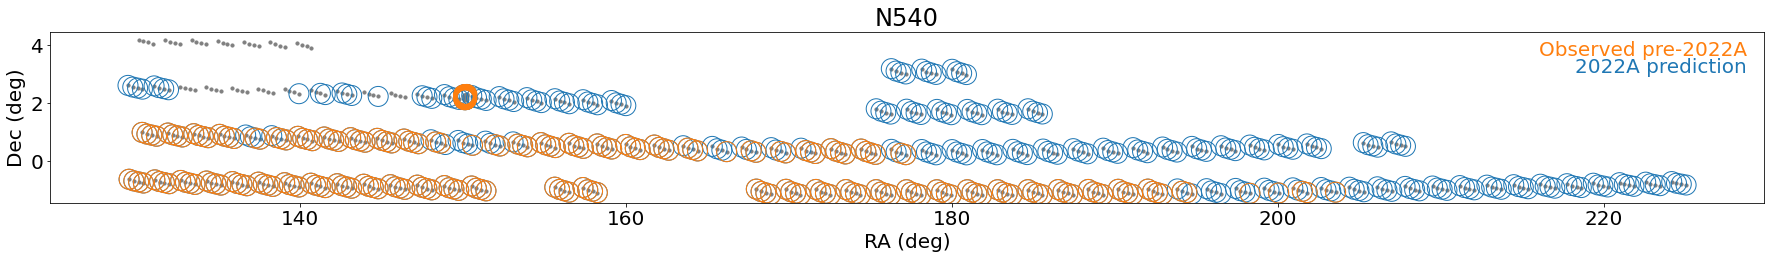

In [102]:
fig = plt.figure(figsize=(25,4))
ax = plt.subplot(111)# aspect='equal')
plt.scatter ( 
    oiii_pointings['RA'],
    oiii_pointings['dec'],
    s=10,
    color='grey',
)    
plt.scatter ( 
    oiii_pointings.reindex(oiii_predictions.query('is_queued').index)['RA'],
    oiii_pointings.reindex(oiii_predictions.query('is_queued').index)['dec'],
    s=400, ec='C0', fc='None', lw=1
) 
plt.scatter ( 
    oiii_pointings.reindex(prior_pointings.query('is_queued').index)['RA'],
    oiii_pointings.reindex(prior_pointings.query('is_queued').index)['dec'],
    s=400, ec='C1', fc='None'
)
ax.text ( 0.99, .95, 'Observed pre-2022A', ha='right', va='top', color='C1', transform=ax.transAxes )
ax.text ( 0.99, .85, '2022A prediction', ha='right', va='top', color='C0', transform=ax.transAxes )
ax.set_xlabel ('RA (deg)')
ax.set_ylabel ('Dec (deg)')
ax.set_title('N540')
plt.tight_layout()
plt.savefig('../../figures/2022A_N540predictions.png')

### Predict H$\alpha$

#### See output

In [35]:
# prior_pointings.reindex(halpha_pointings.index)
is_queued = prior_pointings.reindex(halpha_pointings.index)
halpha_predictions = predict_next ( halpha_pointings, 
                                  dates[filters=='N708'], slots[filters=='N708'],
                                  {'COSMOS':0,'GAMA':1},
                                  is_queued )

[predict] night slot: Second half
obsStart: 2022/03/02 01:55 AM Santiago
          2022/03/01 11:55 PM ET
          2022/03/02 04:55 AM UTC
obsEnd:   2022/03/02 06:32 AM Santiago
          2022/03/02 04:32 AM ET
          2022/03/02 09:32 AM UTC
Minimum airmass available: 1.144137838482521
(270s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1421126141748965

==> 20220302_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.1420400452163324

==> 20220302_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.1428730154537299

==> 20220302_07, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.1447241282092508

==> 20220302_08, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220307_09
  warnings.warn (f'Queue empty at {hstr}')


[predict] night slot: Second half
obsStart: 2022/03/08 01:54 AM Santiago
          2022/03/07 11:54 PM ET
          2022/03/08 04:54 AM UTC
obsEnd:   2022/03/08 06:36 AM Santiago
          2022/03/08 04:36 AM ET
          2022/03/08 09:36 AM UTC
Minimum airmass available: 1.1511131139927078
(360s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1604166778949083

==> 20220308_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.1608474159966353

==> 20220308_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.2346324220445632

==> 20220308_07, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.4730355809796924

==> 20220308_08, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220308_09
  warnings.warn (f'Queue empty at {hstr}')


[predict] night slot: Full night
obsStart: 2022/03/29 08:45 PM Santiago
          2022/03/29 07:45 PM ET
          2022/03/29 11:45 PM UTC
obsEnd:   2022/03/30 06:51 AM Santiago
          2022/03/30 05:51 AM ET
          2022/03/30 09:51 AM UTC
Minimum airmass available: 1.3439747684875563

==> 20220329_23, 899.9999999999906s available
0.0s filled by priority=0.0 objects
600.0s filled by priority=1.0 objects
Minimum airmass available: 1.2307748066161321

==> 20220330_00, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.185926015845825

==> 20220330_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.1448131892121527

==> 20220330_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.1586183747439676

==> 20220330_03, 3600.0s available
0.0s filled by priority=0.0 objects


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220330_07
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220330_08
  warnings.warn (f'Queue empty at {hstr}')


Minimum airmass available: 8.156436418379762

==> 20220330_09, 4260.000000000029s available
[plan_night] padding the last hour script
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220330_09
  warnings.warn (f'Queue empty at {hstr}')


[predict] night slot: Full night
obsStart: 2022/03/30 08:43 PM Santiago
          2022/03/30 07:43 PM ET
          2022/03/30 11:43 PM UTC
obsEnd:   2022/03/31 06:52 AM Santiago
          2022/03/31 05:52 AM ET
          2022/03/31 09:52 AM UTC
Minimum airmass available: 1.3481533872111937

==> 20220330_23, 1019.9999999999901s available
0.0s filled by priority=0.0 objects
600.0s filled by priority=1.0 objects
Minimum airmass available: 1.2313327785231105

==> 20220331_00, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.1942440571801374

==> 20220331_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.1751756834478104

==> 20220331_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
Minimum airmass available: 1.159668310560744

==> 20220331_03, 3600.0s available
0.0s filled by priority=0.0 objects

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220331_06
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220331_07
  warnings.warn (f'Queue empty at {hstr}')


Minimum airmass available: 2.0351523187838394

==> 20220331_07, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!
Minimum airmass available: 3.3988660836449416

==> 20220331_08, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!
Minimum airmass available: 13.307854085544616

==> 20220331_09, 4320.000000000029s available
[plan_night] padding the last hour script
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
!!! Nothing to queue !!!


/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220331_08
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/merian/skipper/python/skipper/observe.py:392: UserWarning: Queue empty at 20220331_09
  warnings.warn (f'Queue empty at {hstr}')


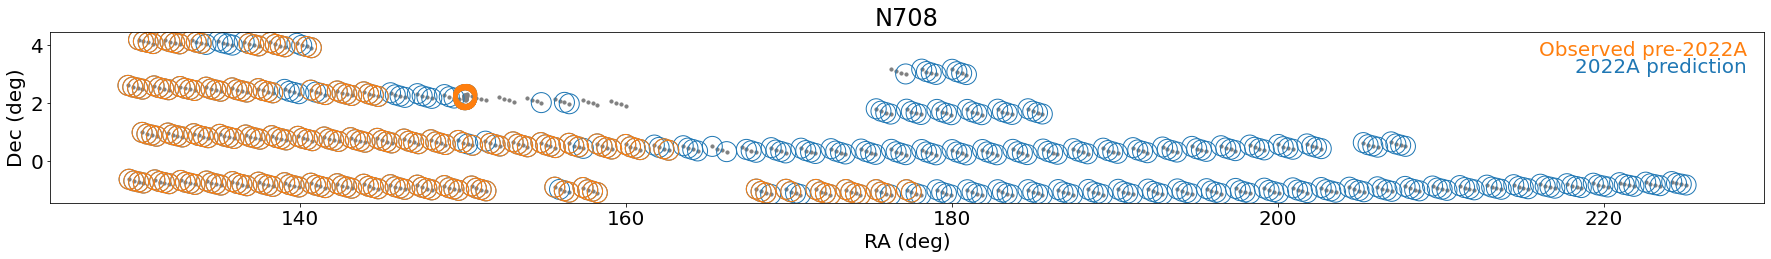

In [104]:
fig = plt.figure(figsize=(25,4))
ax = plt.subplot(111)# aspect='equal')
plt.scatter ( 
    halpha_pointings['RA'],
    halpha_pointings['dec'],
    s=10,
    color='grey',
)    
plt.scatter ( 
    halpha_pointings.reindex(halpha_predictions.query('is_queued').index)['RA'],
    halpha_pointings.reindex(halpha_predictions.query('is_queued').index)['dec'],
    s=400, ec='C0', fc='None', lw=1
) 
plt.scatter ( 
    halpha_pointings.reindex(prior_pointings.query('is_queued').index)['RA'],
    halpha_pointings.reindex(prior_pointings.query('is_queued').index)['dec'],
    s=400, ec='C1', fc='None'
)

ax.text ( 0.99, .95, 'Observed pre-2022A', ha='right', va='top', color='C1', transform=ax.transAxes )
ax.text ( 0.99, .85, '2022A prediction', ha='right', va='top', color='C0', transform=ax.transAxes )
ax.set_xlabel ('RA (deg)')
ax.set_ylabel ('Dec (deg)')

ax.set_title('N708')
plt.tight_layout()
plt.savefig('../../figures/2022A_N708predictions.png')

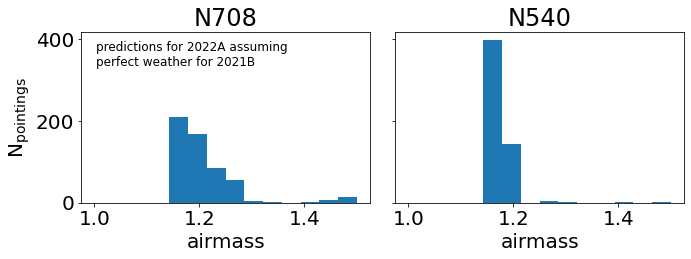

In [105]:
fig, axarr = plt.subplots(1,2,figsize=(10,4), sharey=True)
bins = np.linspace(1.,1.5,15)
axarr[0].hist ( halpha_predictions['airmass'], bins=bins )
axarr[1].hist ( oiii_predictions['airmass'], bins=bins )
for ax in axarr:
    ax.set_xlabel('airmass')
axarr[0].set_ylabel(r'$\rm N_{pointings}$')
plt.tight_layout ()

axarr[0].set_title(r'N708')
axarr[1].set_title('N540')
axarr[0].text(.05,.95,'''predictions for 2022A assuming
perfect weather for 2021B''', ha='left',va='top',
             transform=axarr[0].transAxes, fontsize=12)
plt.tight_layout ()
plt.savefig('../../figures/2022A_airmass_predictions.png')